In [6]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
import math
style.use("dark_background")
%matplotlib inline

#simulators
qasm_sim = q.Aer.get_backend("qasm_simulator")
statevec_sim = q.Aer.get_backend("statevector_simulator")

Uncertain Qubits

In [26]:
c = q.QuantumCircuit(2,2) #two qubits, two classical bits
c.ry(math.pi/4, 0) #rotation on the y axis at qu
c.ry(math.pi/4, 1) #rotation on the y axis at qubit at index 1
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) #measure bits to classical bits
c.draw()

┌──────────┐┌─┐   
q_0: |0>┤ Ry(pi/4) ├┤M├───
        ├──────────┤└╥┘┌─┐
q_1: |0>┤ Ry(pi/4) ├─╫─┤M├
        └──────────┘ ║ └╥┘
 c_0: 0 ═════════════╩══╬═
                        ║ 
 c_1: 0 ════════════════╩═

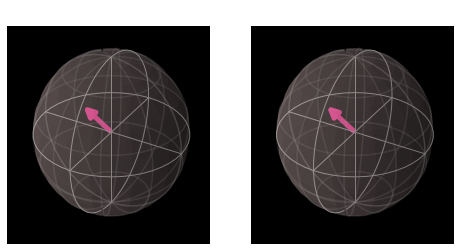

In [27]:
plot_bloch_multivector(orig_statevec)

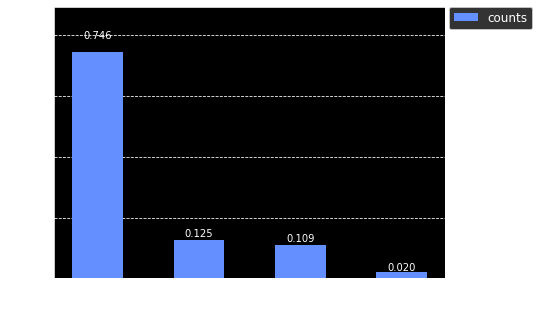

In [28]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['counts'])

Uncertain qubits, hadamards at front

In [29]:
c = q.QuantumCircuit(2,2) #two qubits, two classical bits
c.h(0)
c.h(1)
c.ry(math.pi/4, 0) #rotation on the y axis at qu
c.ry(math.pi/4, 1) #rotation on the y axis at qubit at index 1
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) #measure bits to classical bits
c.draw()

┌───┐┌──────────┐┌─┐   
q_0: |0>┤ H ├┤ Ry(pi/4) ├┤M├───
        ├───┤├──────────┤└╥┘┌─┐
q_1: |0>┤ H ├┤ Ry(pi/4) ├─╫─┤M├
        └───┘└──────────┘ ║ └╥┘
 c_0: 0 ══════════════════╩══╬═
                             ║ 
 c_1: 0 ═════════════════════╩═

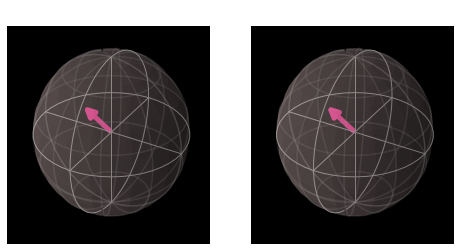

In [30]:
plot_bloch_multivector(orig_statevec)

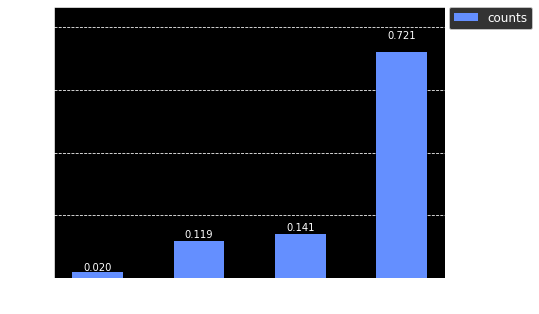

In [31]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

Hmmmm it looks with Hadamard gates the multivector changed and the graph fliped.

Hadamard Sandwich on uncertain qubits

In [32]:
c = q.QuantumCircuit(2,2) #two qubits, two classical bits
c.h(0)
c.h(1)
c.ry(math.pi/4, 0) #rotation on the y axis at qu
c.ry(math.pi/4, 1) #rotation on the y axis at qubit at index 1
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) #measure bits to classical bits
c.draw()

┌───┐┌──────────┐┌───┐┌─┐   
q_0: |0>┤ H ├┤ Ry(pi/4) ├┤ H ├┤M├───
        ├───┤├──────────┤├───┤└╥┘┌─┐
q_1: |0>┤ H ├┤ Ry(pi/4) ├┤ H ├─╫─┤M├
        └───┘└──────────┘└───┘ ║ └╥┘
 c_0: 0 ═══════════════════════╩══╬═
                                  ║ 
 c_1: 0 ══════════════════════════╩═

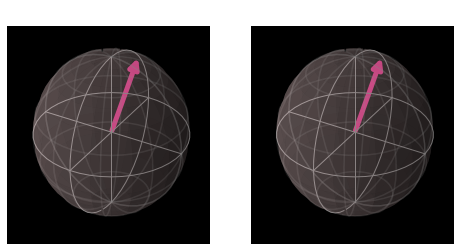

In [33]:
plot_bloch_multivector(statevec)

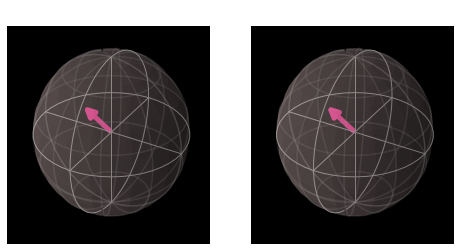

In [34]:
plot_bloch_multivector(orig_statevec)

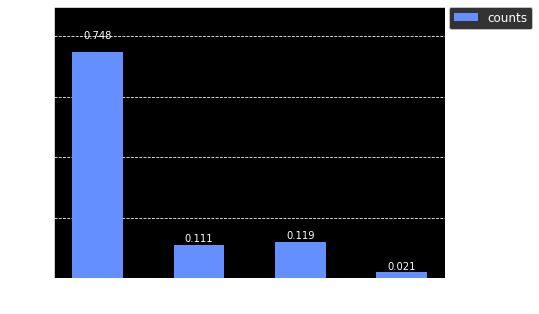

In [35]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

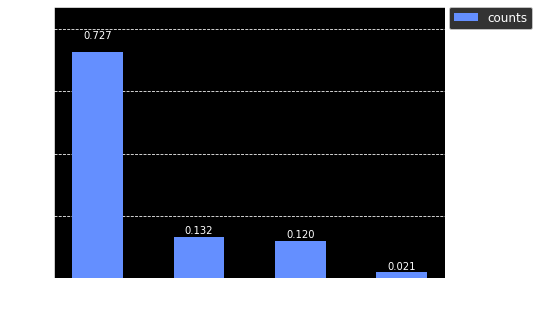

In [36]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['counts'])

Both give us the same output on distribution

Certain qubits

In [37]:
c = q.QuantumCircuit(2,2) #two qubits, two classical bits
c.x(0) 
c.x(1) 
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) #measure bits to classical bits
c.draw()

┌───┐┌─┐   
q_0: |0>┤ X ├┤M├───
        ├───┤└╥┘┌─┐
q_1: |0>┤ X ├─╫─┤M├
        └───┘ ║ └╥┘
 c_0: 0 ══════╩══╬═
                 ║ 
 c_1: 0 ═════════╩═

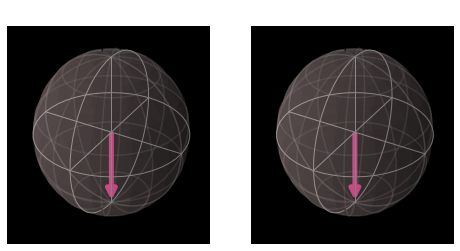

In [38]:
plot_bloch_multivector(orig_statevec)

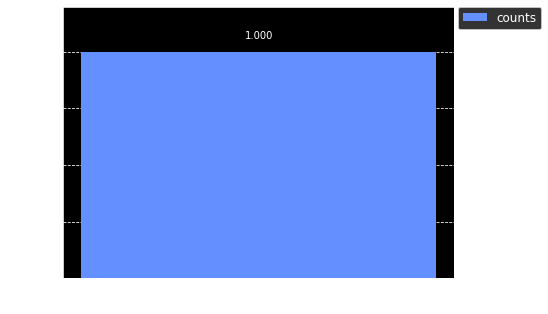

In [39]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['counts'])

Hadamard in front of certain qubits

In [40]:
c = q.QuantumCircuit(2,2) #two qubits, two classical bits
c.h(0) 
c.h(1) 
c.x(0) 
c.x(1) 
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) #measure bits to classical bits
c.draw()

┌───┐┌───┐┌─┐   
q_0: |0>┤ H ├┤ X ├┤M├───
        ├───┤├───┤└╥┘┌─┐
q_1: |0>┤ H ├┤ X ├─╫─┤M├
        └───┘└───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

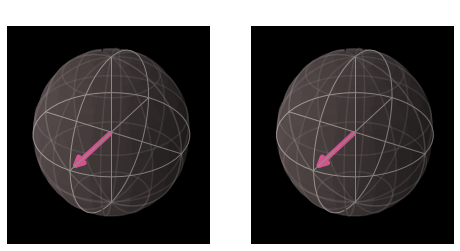

In [41]:
plot_bloch_multivector(statevec)

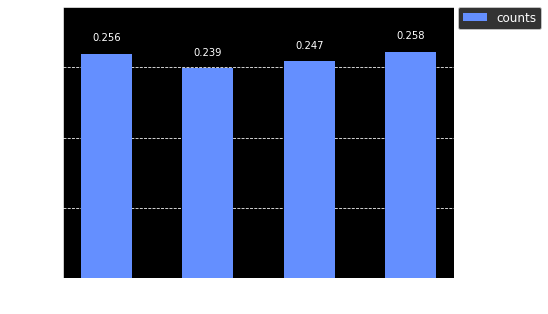

In [42]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

Hadamard Sandwich certain qubits

In [43]:
c = q.QuantumCircuit(2,2) #two qubits, two classical bits
c.h(0) 
c.h(1) 
c.x(0) 
c.x(1) 
c.h(0) 
c.h(1) 
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) #measure bits to classical bits
c.draw()

┌───┐┌───┐┌───┐┌─┐   
q_0: |0>┤ H ├┤ X ├┤ H ├┤M├───
        ├───┤├───┤├───┤└╥┘┌─┐
q_1: |0>┤ H ├┤ X ├┤ H ├─╫─┤M├
        └───┘└───┘└───┘ ║ └╥┘
 c_0: 0 ════════════════╩══╬═
                           ║ 
 c_1: 0 ═══════════════════╩═

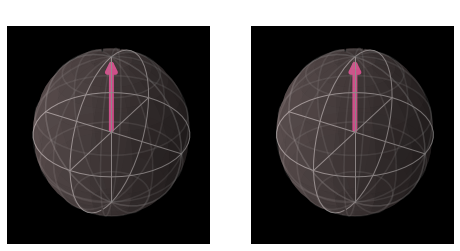

In [44]:
plot_bloch_multivector(statevec)

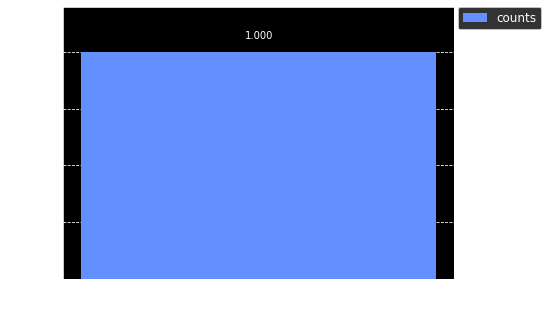

In [45]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

In [46]:
def balanced_black_box(c):
    c.cx(0,2)
    c.cx(1,2)
    return c

def constant_black_box(c):
    return c

In [48]:
c = q.QuantumCircuit(3,2)
c = balanced_black_box(c)
c.draw()

q_0: |0>──■───────
          │       
q_1: |0>──┼────■──
        ┌─┴─┐┌─┴─┐
q_2: |0>┤ X ├┤ X ├
        └───┘└───┘
 c_0: 0 ══════════
                  
 c_1: 0 ══════════

In [49]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c = balanced_black_box(c)
c.h(0)
c.h(1)
c.draw()

┌───┐     ┌───┐     
q_0: |0>┤ H ├──■──┤ H ├─────
        ├───┤  │  └───┘┌───┐
q_1: |0>┤ H ├──┼────■──┤ H ├
        ├───┤┌─┴─┐┌─┴─┐└───┘
q_2: |0>┤ H ├┤ X ├┤ X ├─────
        └───┘└───┘└───┘     
 c_0: 0 ════════════════════
                            
 c_1: 0 ════════════════════

In [55]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1], [0,1])
c.draw()

░ ┌───┐ ░            ░ ┌───┐┌─┐   
q_0: |0>──────░─┤ H ├─░───■────────░─┤ H ├┤M├───
              ░ ├───┤ ░   │        ░ ├───┤└╥┘┌─┐
q_1: |0>──────░─┤ H ├─░───┼────■───░─┤ H ├─╫─┤M├
        ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: |0>┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
        └───┘ ░ └───┘ ░ └───┘└───┘ ░       ║  ║ 
 c_0: 0 ═══════════════════════════════════╩══╬═
                                              ║ 
 c_1: 0 ══════════════════════════════════════╩═

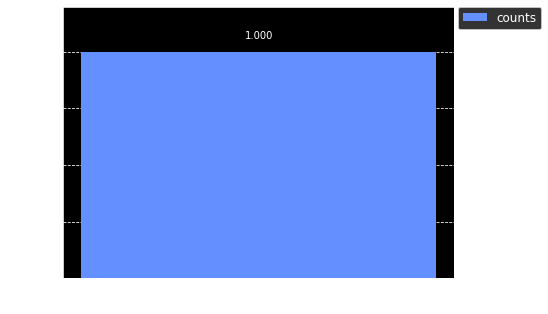

In [56]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

In [57]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1], [0,1])
c.draw()

░ ┌───┐ ░  ░ ┌───┐┌─┐   
q_0: |0>──────░─┤ H ├─░──░─┤ H ├┤M├───
              ░ ├───┤ ░  ░ ├───┤└╥┘┌─┐
q_1: |0>──────░─┤ H ├─░──░─┤ H ├─╫─┤M├
        ┌───┐ ░ ├───┤ ░  ░ └───┘ ║ └╥┘
q_2: |0>┤ X ├─░─┤ H ├─░──░───────╫──╫─
        └───┘ ░ └───┘ ░  ░       ║  ║ 
 c_0: 0 ═════════════════════════╩══╬═
                                    ║ 
 c_1: 0 ════════════════════════════╩═

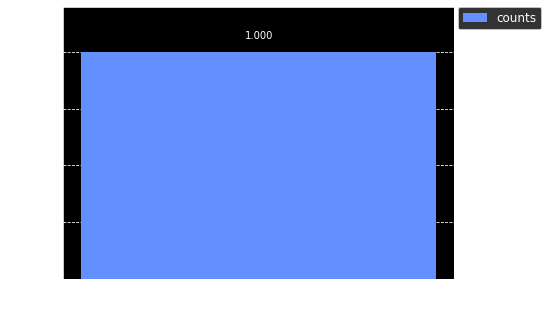

In [58]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

In [60]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)
c.draw()

┌───┐┌───┐
q_0: |0>┤ X ├┤ H ├
        └───┘└───┘
 c_0: 0 ══════════

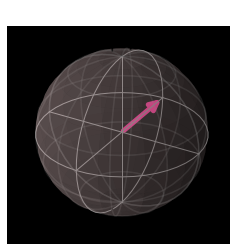

In [63]:
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

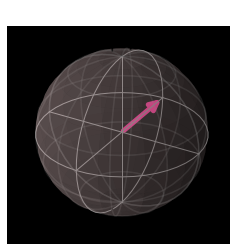

In [69]:
c = q.QuantumCircuit(1,1)
c.ry(math.pi,0)
c.h(0)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

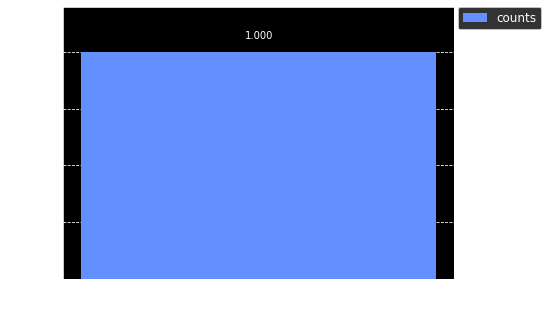

In [75]:
c = q.QuantumCircuit(3,2)
#c.ry(math.pi,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.ry(math.pi,2)
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1], [0,1])
c.draw()
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])